In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from yellowbrick.regressor import PredictionError, ResidualsPlot

In [102]:
df = pd.read_csv('dataset/house-prices-advanced-regression-techniques/train.csv')

In [103]:
df.corr()['SalePrice'].abs().sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

In [104]:
df['OverallQual'].describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

In [105]:
df['GrLivArea'].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

In [106]:
pd.get_dummies(df).corr()['SalePrice'].abs().sort_values(ascending=False).head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
ExterQual_TA    0.589044
FullBath        0.560664
BsmtQual_Ex     0.553105
Name: SalePrice, dtype: float64

In [107]:
df['ExterQual'].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [134]:
steamlit_df = df[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars', '1stFlrSF', 'ExterQual']]

In [135]:
steamlit_df.isnull().sum()

SalePrice      0
OverallQual    0
GrLivArea      0
GarageArea     0
GarageCars     0
1stFlrSF       0
ExterQual      0
dtype: int64

In [136]:
skew_before_log = steamlit_df.skew().abs()

In [137]:
skew_after_log = np.log(steamlit_df.select_dtypes('number') + 1).skew().abs()

In [138]:
pd.DataFrame({
    'before_log':skew_before_log,
    'after_log':skew_after_log
})

,before_log,after_log
SalePrice,1.882876,0.121347
OverallQual,0.216944,0.590977
GrLivArea,1.366560,0.006140
GarageArea,0.179981,3.482604
GarageCars,0.342549,1.370219
1stFlrSF,1.376757,0.080114


SalePrice, GrLivArea lebih baik apabila dilakukan log transform

In [141]:
steamlit_df['SalePrice'] = np.log(steamlit_df['SalePrice'] + 1)

C:\Users\Elga Ridho Maulana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [142]:
steamlit_df['GrLivArea'] = np.log(steamlit_df['GrLivArea'] + 1)

C:\Users\Elga Ridho Maulana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [139]:
steamlit_df['1stFlrSF'] = np.log(steamlit_df['1stFlrSF'] + 1)

C:\Users\Elga Ridho Maulana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [143]:
steamlit_df

,SalePrice,OverallQual,GrLivArea,GarageArea,GarageCars,1stFlrSF,ExterQual
0,12.247699,7,7.444833,548,2,6.753438,Gd
1,12.109016,6,7.141245,460,2,7.141245,TA
2,12.317171,7,7.488294,608,2,6.825460,Gd
3,11.849405,7,7.448916,642,3,6.869014,TA
4,12.429220,8,7.695758,836,3,7.044033,Gd
...,...,...,...,...,...,...,...
1455,12.072547,6,7.407318,460,2,6.860664,TA
1456,12.254868,6,7.637234,500,2,7.637234,TA
1457,12.493133,7,7.758333,252,1,7.080868,Ex
1458,11.864469,5,6.983790,240,1,6.983790,TA


In [144]:
steamlit_df['GarageCars'].describe()

count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64

In [145]:
model_df = pd.get_dummies(steamlit_df)

In [146]:
pd.get_dummies(steamlit_df)

,SalePrice,OverallQual,GrLivArea,GarageArea,GarageCars,1stFlrSF,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
0,12.247699,7,7.444833,548,2,6.753438,0,0,1,0
1,12.109016,6,7.141245,460,2,7.141245,0,0,0,1
2,12.317171,7,7.488294,608,2,6.825460,0,0,1,0
3,11.849405,7,7.448916,642,3,6.869014,0,0,0,1
4,12.429220,8,7.695758,836,3,7.044033,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1455,12.072547,6,7.407318,460,2,6.860664,0,0,0,1
1456,12.254868,6,7.637234,500,2,7.637234,0,0,0,1
1457,12.493133,7,7.758333,252,1,7.080868,1,0,0,0
1458,11.864469,5,6.983790,240,1,6.983790,0,0,0,1


## Modelling

In [147]:
X = model_df.drop('SalePrice', axis=1)

In [148]:
y = model_df['SalePrice']

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

In [150]:
import pickle

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

In [152]:
X_train

,OverallQual,GrLivArea,GarageArea,GarageCars,1stFlrSF,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
931,5,6.830874,429,1,6.830874,0,0,0,1
1436,4,6.762730,528,2,6.762730,0,0,0,1
1214,5,6.907755,300,1,6.907755,0,0,0,1
611,6,6.940222,564,2,6.940222,0,0,0,1
1376,6,6.673298,160,1,6.673298,0,0,0,1
...,...,...,...,...,...,...,...,...,...
350,9,7.533694,617,2,7.533694,1,0,0,0
1275,5,7.560601,400,2,6.834109,0,0,0,1
71,4,6.740519,360,2,6.740519,0,0,0,1
599,6,7.350516,452,2,6.575076,0,0,0,1


In [181]:
pickle.dump(X_train, open('X_train.sav', 'wb'))

In [182]:
pickle.dump(y_train, open('y_train.sav', 'wb'))

In [183]:
pickle.dump(X_test, open('X_test.sav', 'wb'))

In [184]:
pickle.dump(y_test, open('y_test.sav', 'wb'))

### Linear Regression

In [153]:
model_lr = LinearRegression()

In [154]:
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [155]:
model_lr.score(X_train, y_train)

0.8031929638765777

In [156]:
prediction = model_lr.predict(X_test)

In [157]:
np.exp(prediction) - 1

array([102008.91330722, 167554.67707459, 163074.8693835 , 180386.54638503,
       150117.20757573, 147398.46991098, 212862.50090103, 112298.71646783,
       120988.26297631, 143031.75024868, 143685.52907542, 143486.04329941,
       218329.04169695, 107729.52258904, 209465.80663043, 116170.87632665,
       160790.332415  , 173347.58472527, 154533.0918346 ,  94928.69085993,
        97207.87587828, 204848.41792727,  73614.29731302, 161251.55479328,
        95358.07326542, 294912.39350323, 309019.97771667, 181245.40490049,
       135640.08149586, 142427.23359204, 111810.29728954, 203357.8225845 ,
       122725.49633792, 204323.519559  , 210596.57531266, 119516.95906815,
       117616.15768467, 286032.69006542, 241373.18507616, 131756.6183257 ,
       123429.33859773, 152469.7390785 , 156804.80165309, 291874.39924816,
       196288.88018297, 109717.4564492 , 218411.86407222, 292803.38832478,
       126772.05047735, 106534.89333559, 115479.92469608, 412871.34257959,
       101119.05247423, 2

In [158]:
np.sqrt(mean_squared_error(y_test, prediction))

0.16032007061371417

In [159]:
pickle.dump(model_lr, open('model_lr.sav', 'wb'))

In [160]:
import eli5

Using TensorFlow backend.


In [166]:
feature_name = X_train.columns.to_list()

In [179]:
eli5.formatters.as_dataframe.explain_weights_df(estimator=model_lr, feature_names=feature_name)[['feature', 'weight']]

,feature,weight
0,<BIAS>,7.375570
1,GrLivArea,0.315374
2,1stFlrSF,0.211053
3,OverallQual,0.111962
4,ExterQual_Ex,0.102712
5,GarageCars,0.079705
6,ExterQual_Gd,0.078185
7,GarageArea,0.000065
8,ExterQual_TA,-0.010845
9,ExterQual_Fa,-0.170052


In [175]:
eli5.explain_weights(model_lr, feature_names=feature_name)

Weight?,Feature
+7.376,<BIAS>
+0.315,GrLivArea
+0.211,1stFlrSF
+0.112,OverallQual
+0.103,ExterQual_Ex
+0.080,GarageCars
+0.078,ExterQual_Gd
+0.000,GarageArea
-0.011,ExterQual_TA
-0.170,ExterQual_Fa


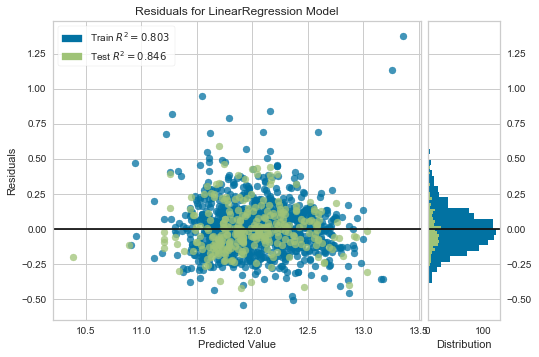

In [188]:
visualizer_residual = ResidualsPlot(model_lr)
visualizer_residual.fit(X_train, y_train)
visualizer_residual.score(X_test, y_test)
visualizer_residual.finalize()
plt.savefig('residual.jpg')

### Ridge Regression

In [64]:
model_ridge = Ridge(alpha=0.7)
model_ridge.fit(X_train, y_train)
prediction = model_ridge.predict(X_test)
np.sqrt(mean_squared_error(y_test, prediction))

0.012769967687894774

### Lasso Regression

In [69]:
model_ridge = Lasso(alpha=0.1)
model_ridge.fit(X_train, y_train)
prediction = model_ridge.predict(X_test)
np.sqrt(mean_squared_error(y_test, prediction))

0.03139521720634809